In [34]:
import numpy as np
import pandas as pd
from hmmlearn import hmm
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering

In [65]:
# parseFasta(data) credit to Luke
def parseFasta(data):
    d = {fasta.id : str(fasta.seq) for fasta in SeqIO.parse(data, "fasta")}
    pd.DataFrame([d])
    s = pd.Series(d, name='Sequence')
    s.index.name = 'ID'
    s.reset_index()
    return pd.DataFrame(s)

# this method credit to Zhiwen
def get_kmer_table(paths,k_min,k_max):
    genes,gene_len = read_fasta(paths)
    count_vect = CountVectorizer(analyzer='char', ngram_range=(k_min, k_max))
    X = count_vect.fit_transform(genes)
    chars = count_vect.get_feature_names()
    kmers = X.toarray()
    kmer_freq = []
    for i in range(len(genes)):
        kmer_freq.append(kmers[i] / gene_len[i])
    input = pd.DataFrame(kmer_freq, columns=chars)
    return input

# this method credit to Zhiwen
def get_gene_sequences(filename):
    genes = []
    for record in SeqIO.parse(filename, "fasta"):
        genes.append(str(record.seq))
    return genes

# this method credit to Zhiwen
# genes: a list of gene sequences, which can directly be generated from get_gene_sequences().
def get_gene_len(genes):
    gene_len = []

    for i in range(len(genes)):
        gene_len.append(len(genes[i]))
    return gene_len

# this method credit to Zhiwen
def read_fasta(paths):
    all_genes = []
    all_gene_len = []
    
    for path in paths:
        virus = parseFasta(path)
        virus = virus.drop_duplicates(keep="last")
        genes = list(virus['Sequence'])
        genes_seq = get_gene_sequences(path)
        gene_len = get_gene_len(genes_seq)
        all_genes = all_genes + genes_seq
        all_gene_len = all_gene_len + gene_len
    return all_genes,all_gene_len

def spectral_clustering(paths, k_min, k_max, num_cluster, assignLabels):
    kmer_table = get_kmer_table(paths, k_min, k_max)
    spectral_clustering = SpectralClustering(n_clusters= num_cluster, assign_labels = assignLabels, random_state = 0)
    labels = spectral_clustering.fit_predict(kmer_table)
    return labels

In [66]:
bat_len = len(get_gene_sequences("bat_flu.fa"))
cat_len = len(get_gene_sequences("cat_flu.fa"))
zeros = [0]*bat_len
labels1 = np.append(zeros, [1]*cat_len, axis=None)

In [70]:
paths = ["bat_flu.fa","cat_flu.fa"]
accuracy_kmeans = 0
optimal_k_min = 0
optimal_k_max = 0
optimal_prediction = [0]*(bat_len+cat_len)
for i in range(2, 6):
    for j in range(i + 1, 8):
        
        k_min = i
        k_max = j
        num_class = 2
        predictions_kmeans = spectral_clustering(paths,k_min,k_max,num_class,'kmeans')
        temp_accuracy = 1 - sum(abs(labels1 - predictions_kmeans))/(bat_len+cat_len)
        if(temp_accuracy > accuracy_kmeans):
            accuracy_kmeans = temp_accuracy
            optimal_k_min = i
            optimal_k_max = j
            optimal_prediction = predictions_kmeans
accuracy_kmeans

0.7640449438202247

In [85]:
labels1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [71]:
optimal_prediction

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [91]:
optimal_kmer_table = get_kmer_table(paths, optimal_k_min, optimal_k_max);
optimal_clustering = SpectralClustering(n_clusters = 2, assign_labels="kmeans", random_state=0).fit(optimal_kmer_table)
optimal_clustering[:, 0]

TypeError: 'SpectralClustering' object is not subscriptable

IndexError: too many indices for array

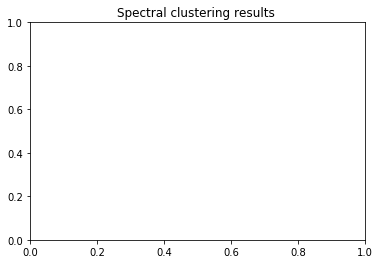

In [95]:
optimal_kmer_table = get_kmer_table(paths, optimal_k_min, optimal_k_max);
optimal_clustering = SpectralClustering(n_clusters = 2, assign_labels="kmeans", random_state=0).fit(optimal_kmer_table)
y_pred = optimal_clustering.labels_.astype(np.int)
plt.title(f'Spectral clustering results ')
plt.scatter(optimal_clustering[:, 0],optimal_clustering[:, 1],c=y_pred, s=50)


In [75]:
paths = ["bat_flu.fa","cat_flu.fa"]
accuracy_discrete = 0
optimal_k_min = 0
optimal_k_max = 0
optimal_prediction_discrete = [0]*(bat_len+cat_len)
for i in range(2, 6):
    for j in range(i + 1, 8):

        k_min = i
        k_max = j
        num_class = 2
        predictions_d = spectral_clustering(paths,k_min,k_max,num_class,'discretize')
        temp_accuracy = 1 - sum(abs(labels1 - predictions_d))/(bat_len+cat_len)
        if(temp_accuracy > accuracy_discrete):
            accuracy_discrete = temp_accuracy
            optimal_k_min = i
            optimal_k_max = j
            optimal_prediction_discrete = predictions_d
accuracy_discrete

0.5561797752808989

In [76]:
optimal_prediction_discrete

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0], dtype=int64)

NameError: name 'X' is not defined

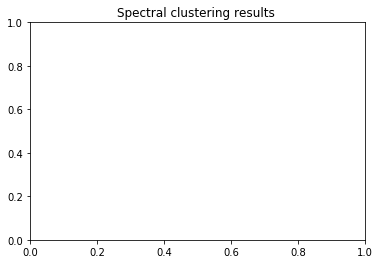

In [77]:
optimal_kmer_table = get_kmer_table(paths, optimal_k_min, optimal_k_max);
optimal_clustering = SpectralClustering(n_clusters = 2, assign_labels="discretize", random_state=0).fit(optimal_kmer_table)
y_pred = optimal_clustering.labels_
plt.title(f'Spectral clustering results ')
plt.scatter(X[:, 0], X[:, 1], s=50, c = y_pred);